# Génération d'un dataset pour le POC

### Contexte
Les données concernent une même portion de route limitée à 130 km/h. Nous récupérons les données pour 10 000 trajets de 5 secondes sur cette portion de route. Certains de ces trajets ont débouché sur un accident.

### Paramètres
Le POC se base sur la simulation de deux paramètres : un capteur de vitesse et un capteur d'humidité.

### Interprétation
Le dataset est généré de manière à pouvoir évaluer instinctevement le résultat de l'entrainement du modèle de machine learning : les chances d'avoir un accident sont de 1% à la base. Une vitesse supérieure à 130 km/h augmente le risque d'accident de 40%. S'il pleut, le risque est augmenté de 50%.
Le dataset, et a posteriori le modèle de machine learning, doit montrer clairement une corrélation entre un accident, une route humide et une vitesse élevée. Cette hypothèse est confirmée par les graphiques plus bas.

In [1]:
import random
import pandas as pd

# Paramètres de génération du dataset
nombre_accidents = 5000
duree_en_secondes = 5
variation_max_vitesse = 20  # Variation maximale autorisée entre les lignes de vitesse

# Générer les données pour chaque accident
dataset = []
for _ in range(nombre_accidents):
    # Générer une liste de valeurs aléatoires pour la vitesse
    vitesse = []
    pluie = random.randint(0, 1)  # La pluie reste constante pour chaque cas d'accident
    
    # Générer la première valeur de vitesse
    vitesse.append(random.uniform(0, 200))
    
    # Générer les valeurs de vitesse suivantes en limitant les variations
    for _ in range(duree_en_secondes - 1):
        vitesse_precedente = vitesse[-1]
        vitesse_min = max(90, vitesse_precedente - variation_max_vitesse)
        vitesse_max = min(200, vitesse_precedente + variation_max_vitesse)
        vitesse.append(random.uniform(vitesse_min, vitesse_max))
    
    # Calculer la probabilité d'accident en fonction de la vitesse et de la pluie
    prob_accident = 0.01  # Probabilité de base d'avoir un accident
    
    if max(vitesse) > 130:
        prob_accident += 0.4  # Augmenter la probabilité d'accident si la vitesse est supérieure à 130
    
    if pluie == 1:
        prob_accident += 0.5  # Augmenter la probabilité d'accident s'il y a de la pluie
    
    # Générer aléatoirement un accident en fonction de la probabilité calculée
    accident = 1 if random.random() < prob_accident else 0
    
    # Ajouter les données de l'accident au dataset
    dataset.append({
        'Vitesse': vitesse,
        'Pluie': [pluie] * duree_en_secondes,  # La pluie reste constante pour chaque cas d'accident
        'Accident': accident  # 1 indique qu'il y a eu un accident, 0 sinon
    })

# Générer des données pour les cas sans accident
nombre_non_accidents = 5000  # Nombre de cas sans accident
for _ in range(nombre_non_accidents):
    vitesse = []
    pluie = [random.randint(0, 1) for _ in range(duree_en_secondes)]
    
    # Générer la première valeur de vitesse
    vitesse.append(random.uniform(0, 100))
    
    # Générer les valeurs de vitesse suivantes en limitant les variations
    for _ in range(duree_en_secondes - 1):
        vitesse_precedente = vitesse[-1]
        vitesse_min = max(0, vitesse_precedente - variation_max_vitesse)
        vitesse_max = min(150, vitesse_precedente + variation_max_vitesse)
        vitesse.append(random.uniform(vitesse_min, vitesse_max))
    
    dataset.append({
        'Vitesse': vitesse,
        'Pluie': pluie,
        'Accident': 0  # 0 indique qu'il n'y a pas eu d
})

# Convertir le dataset en DataFrame pandas
df = pd.DataFrame(dataset)

# Enregistrer le dataset dans un fichier CSV
df.to_csv('dataset_accidents.csv', index=False)

In [2]:
import matplotlib.pyplot as plt

# Charger le dataset depuis le fichier CSV
df = pd.read_csv('dataset_accidents.csv', sep=',')
df

,Vitesse,Pluie,Accident
0,"[88.50563721327687, 102.1536142591008, 108.649...","[0, 0, 0, 0, 0]",0
1,"[178.6119305675961, 183.00331380354802, 188.91...","[1, 1, 1, 1, 1]",1
2,"[18.045620825510312, 61.36464593614444, 85.547...","[0, 0, 0, 0, 0]",0
3,"[138.9936847179179, 153.44569897474247, 135.63...","[1, 1, 1, 1, 1]",1
4,"[141.8833878358454, 154.27400697582976, 154.17...","[0, 0, 0, 0, 0]",1
...,...,...,...
9995,"[99.37918066052205, 118.21904369674934, 114.22...","[0, 0, 1, 0, 0]",0
9996,"[38.73921598382145, 52.68850666392102, 34.4213...","[0, 1, 1, 0, 1]",0
9997,"[77.2256242492018, 65.66909830876449, 46.38028...","[1, 0, 0, 1, 0]",0
9998,"[36.17300031193969, 47.22136938720862, 60.3016...","[0, 1, 1, 0, 0]",0


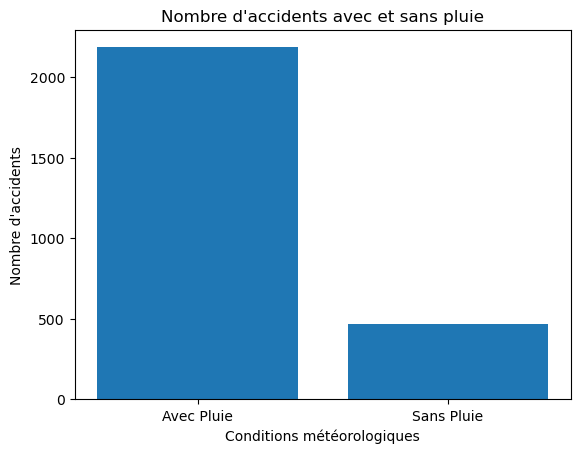

In [3]:
# Charger le dataset depuis le fichier CSV
df = pd.read_csv('dataset_accidents.csv', sep=',')

# Compter le nombre d'accidents avec et sans pluie
accidents_sans_pluie = df[df['Pluie'] == '[0, 0, 0, 0, 0]']['Accident'].sum()
accidents_avec_pluie = df[df['Pluie'] != '[1,1,1,1,1]']['Accident'].sum()

# Créer le graphique
plt.bar(['Avec Pluie', 'Sans Pluie'], [accidents_avec_pluie, accidents_sans_pluie])
plt.xlabel('Conditions météorologiques')
plt.ylabel('Nombre d\'accidents')
plt.title('Nombre d\'accidents avec et sans pluie')
plt.show()

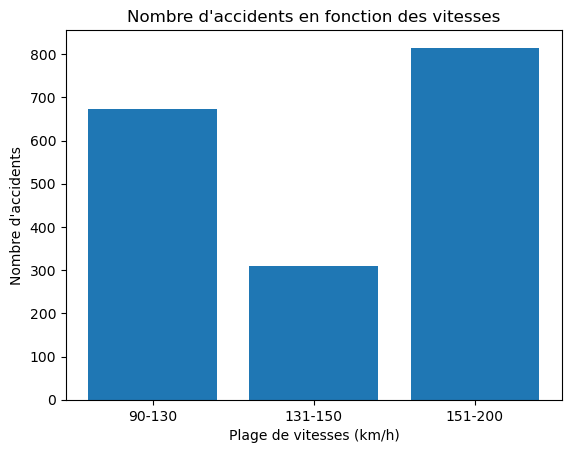

In [8]:
# Charger le dataset depuis le fichier CSV
df = pd.read_csv('dataset_accidents.csv', sep=',')

# Créer des plages de vitesses
bins = [90, 130, 150, 200]
labels = ['90-130', '131-150', '151-200']

# Grouper les vitesses et compter le nombre d'accidents dans chaque plage de vitesses
df['Vitesse_mean'] = df['Vitesse'].apply(lambda x: sum(eval(x)) / len(eval(x)))
df['Vitesse_range'] = pd.cut(df['Vitesse_mean'], bins=bins, labels=labels)
accidents_par_vitesse = df.groupby('Vitesse_range')['Accident'].sum()

# Créer le graphique
plt.bar(accidents_par_vitesse.index, accidents_par_vitesse.values)
plt.xlabel('Plage de vitesses (km/h)')
plt.ylabel('Nombre d\'accidents')
plt.title('Nombre d\'accidents en fonction des vitesses')
plt.show()